

1.   **CARGA Y VISUALIZACIÓN DE DATOS**



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL/train.csv'
df = pd.read_csv(path)
#df.head()
df.info()
# Ver valores nulos a simple vista
df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


**¿Cuantas filas y columnas hay?**

En el dataset contamos con 1460 filas y 81 columnas

**¿Que tipo de dato tenemos?**

En el dataset contamos con tipos de datos enteros, flotantes y objects

**¿Se encuentran valores nulos a simple vista?**

Si con la funcion df.isnull podemos ver las primeras columnas en las que se visualizan registros nulos

2.   **LIMPIEZA DE DATOS**





In [5]:
# Reporte completo de valores nulos
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [6]:
df = df.drop(columns=['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'])

De acuerdo con el análisis de los valores nulos, decidi eliminar las columnas Alley, MasVnrType, PoolQC, Fence, MiscFeature y FireplaceQu, ya que presentan más de un 45% de datos faltantes.

In [7]:
lotFrontageMedian = df['LotFrontage'].median()
print(lotFrontageMedian)
df['LotFrontage'] = df['LotFrontage'].fillna(lotFrontageMedian)
df['LotFrontage'].isnull().sum()

69.0


np.int64(0)

Para la columna LotFrontage, imputé los valores faltantes con la mediana, ya que existen valores atípicos en la distribución que podrían sesgar la media

In [8]:
object_columns = df.select_dtypes(include='object').columns
missing_object_values = missing_values[missing_values.index.isin(object_columns)]
missing_object_values


,0
GarageType,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37
BsmtCond,37
BsmtFinType1,37
Electrical,1


In [9]:
# Lista de columnas a limpiar
columnas = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond',
            'BsmtFinType1', 'Electrical']
# Reemplazar nulos con la moda en cada columna
for col in columnas:
    moda = df[col].mode().iloc[0]  # Obtener la primera moda
    df[col].fillna(moda, inplace=True)  # Reemplazar nulos con la moda
df[columnas].isnull().sum()

/tmp/ipython-input-1353819848.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)  # Reemplazar nulos con la moda


,0
GarageType,0
GarageFinish,0
GarageQual,0
GarageCond,0
BsmtExposure,0
BsmtFinType2,0
BsmtQual,0
BsmtCond,0
BsmtFinType1,0
Electrical,0


Para las columnas GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFin Type2,BsmtQual,BsmtCond,BsmtFinType1,Electrical decidi imputar con la moda ya que estos registros son textos lo cual no se le podria sacar la mediana o la media

In [10]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

,0
GarageYrBlt,81
MasVnrArea,8


In [11]:
df['GarageYrBlt'].std()
AVG_GarageYrBlt = df['GarageYrBlt'].mean()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(AVG_GarageYrBlt)

df['GarageYrBlt'].isnull().sum()

np.int64(0)

La columna GarageYrBlt su desviación estandar es de 24.69 esta es baja teniendo en cuenta que los datos van de 1900 a 2010, es por ello que decidi imputarla con la media

In [12]:
masVnrAreaMode = df['MasVnrArea'].mode()[0]
df['MasVnrArea'] = df['MasVnrArea'].fillna(masVnrAreaMode)

df['MasVnrArea'].isnull().sum()

np.int64(0)

Para columna MasVnrArea se considero imputarla con la moda, debido a su alta desviación y que su moda representaba mas del 50% de los datos

**

3.   **ANALISIS DESCRIPTIVO**



In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

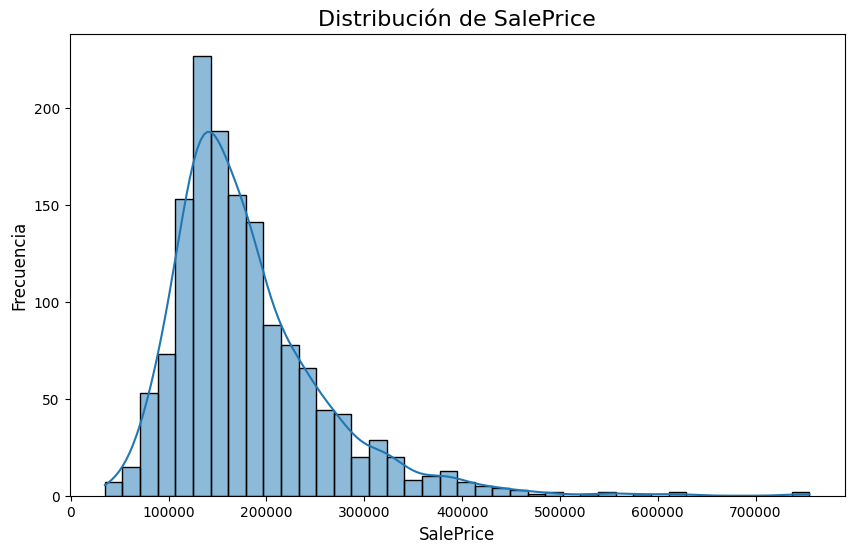

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df["SalePrice"], bins=40, kde=True)
plt.title("Distribución de SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()

La distribución no es simetrica, la mayoria de los precios se concentran entre los 100.000 y 200.000

/tmp/ipython-input-3734904616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
/tmp/ipython-input-3734904616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
/tmp/ipython-input-3734904616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")


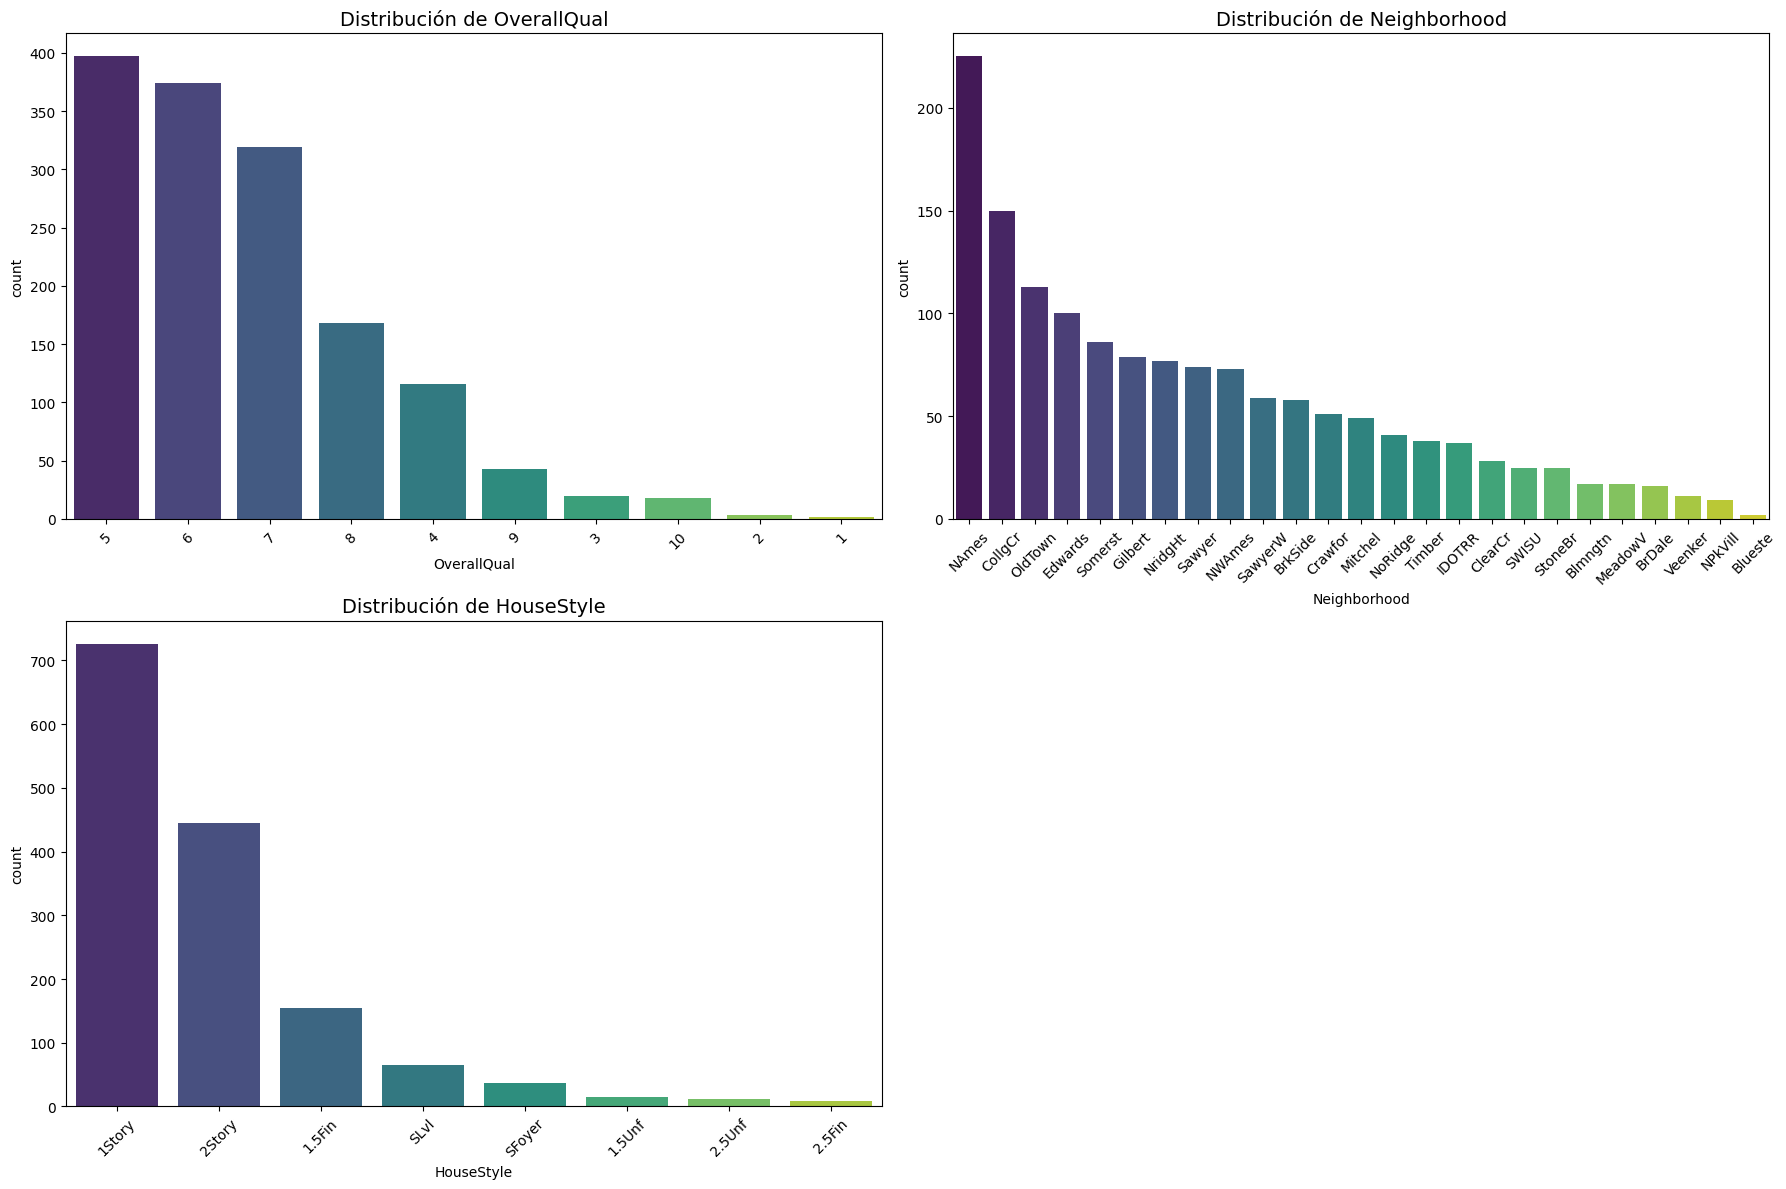

In [18]:
# Definir variables categóricas a graficar
categoricas = ["OverallQual", "Neighborhood", "HouseStyle"]

# Crear gráficos
plt.figure(figsize=(18,12))

for i, col in enumerate(categoricas, 1):
    plt.subplot(2,2,i)  # 2 filas, 2 columnas
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

En las graficas evidenciamos que para la columna overquall nos muestra la calidad general de construcción, Neighborhood nos muestra los vecindarios en lo que estas propiedades se encuentran y por su parte HouseStyle indica el tipo de la casa



4.   **ANALISIS EXPLORATORIO**



Top 5 variables más correlacionadas con SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


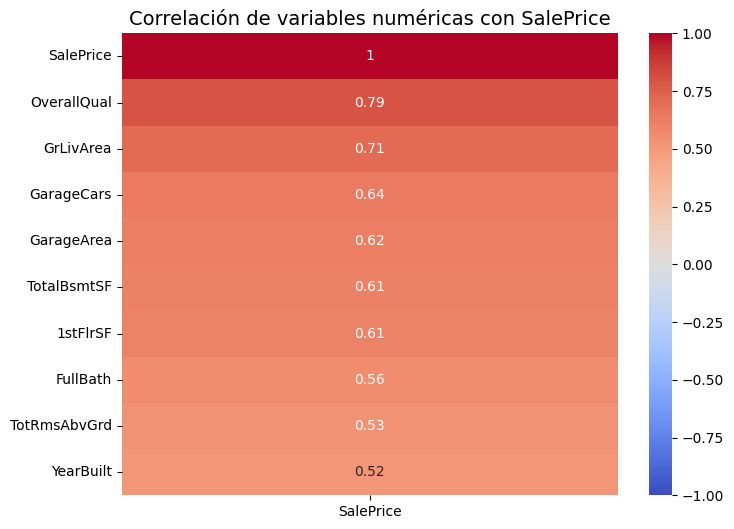

In [19]:
# --- 1. Correlación ---
corr_matrix = df.corr(numeric_only=True)
saleprice_corr = corr_matrix["SalePrice"].sort_values(ascending=False)

# Top 5 variables numéricas
top5_corr = saleprice_corr.drop("SalePrice").head(5)
print("Top 5 variables más correlacionadas con SalePrice:")
print(top5_corr)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix[["SalePrice"]].sort_values(by="SalePrice", ascending=False).head(10),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación de variables numéricas con SalePrice", fontsize=14)
plt.show()

calcule la matriz de correlación de todas las variables numéricas respecto a la variable objetivo SalePrice.

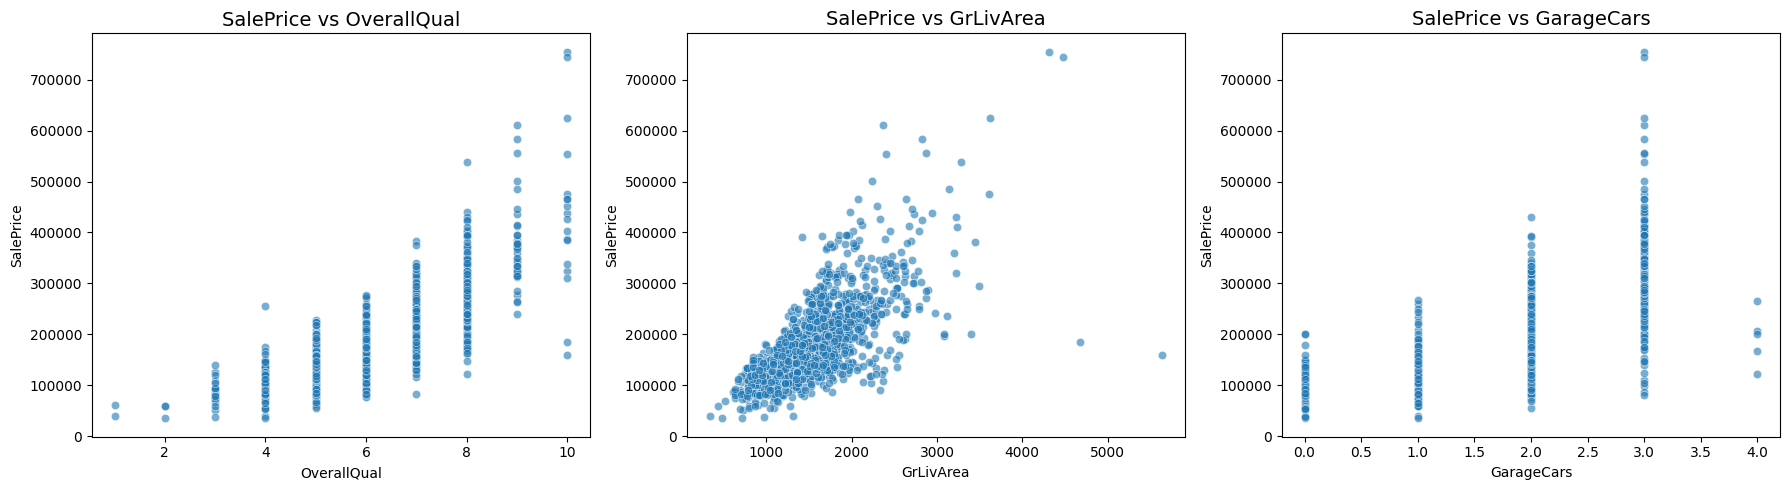

In [20]:
# --- 2. Diagramas de dispersión ---
top3_vars = top5_corr.head(3).index

plt.figure(figsize=(18,5))
for i, col in enumerate(top3_vars, 1):
    plt.subplot(1,3,i)
    sns.scatterplot(data=df, x=col, y="SalePrice", alpha=0.6)
    plt.title(f"SalePrice vs {col}", fontsize=14)

plt.tight_layout()
plt.show()

- En **`OverallQual`**, se observa una clara tendencia creciente: a mayor calidad, mayor precio.  
- En **`GrLivArea`**, la relación también es positiva: viviendas más grandes tienden a costar más.  
- En **`GarageCars`**, se aprecia que a mayor número de espacios en garaje, mayor es el precio, aunque con menos variabilidad que en las dos variables anteriores.

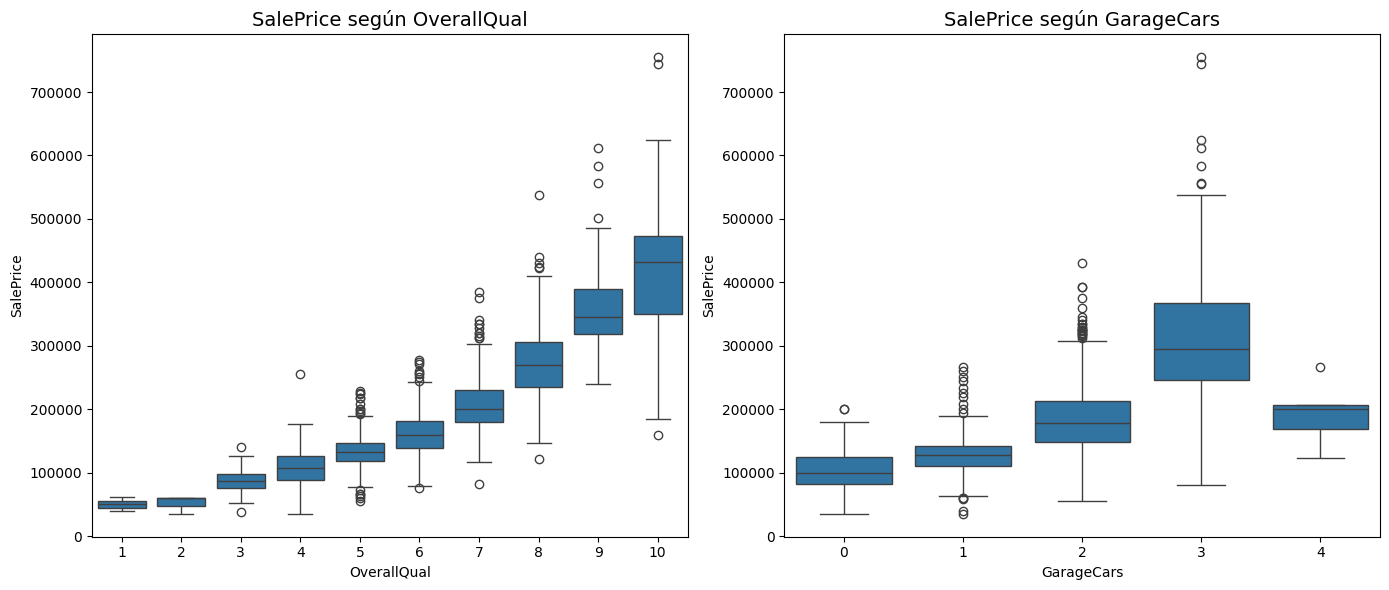

In [21]:
# --- 3. Análisis Categórico ---
plt.figure(figsize=(14,6))

# Boxplot con OverallQual
plt.subplot(1,2,1)
sns.boxplot(data=df, x="OverallQual", y="SalePrice")
plt.title("SalePrice según OverallQual", fontsize=14)

# Boxplot con GarageCars
plt.subplot(1,2,2)
sns.boxplot(data=df, x="GarageCars", y="SalePrice")
plt.title("SalePrice según GarageCars", fontsize=14)

plt.tight_layout()
plt.show()

- **`OverallQual`**: los box plots muestran un incremento notable en la mediana y dispersión de precios a medida que aumenta la calidad de la vivienda.  
- **`GarageCars`**: se observa que las casas con mayor capacidad de garaje tienden a tener precios más altos, aunque los incrementos no son tan pronunciados como en `OverallQual`.  
